### Regression Project

In [1]:
import numpy as np
import pandas as pd

from scipy.stats import yeojohnson,boxcox
from sklearn.preprocessing import StandardScaler,MinMaxScaler,power_transform

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Problem statement

### Data Gathering

In [2]:
df = pd.read_csv('medical_insurance.csv')
df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
print("Number of features: ",df.shape[1])
print("Number of data rows: ",df.shape[0])

Number of features:  7
Number of data rows:  1338


In [4]:
df.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
>> 30 
>> 40 

In [7]:
# 4 columns has continuous data
# 3 column has categorical data in string format

#### 3.1 Missing value detection

In [7]:
df.isna().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

###### - No missing values found in the dataset

#### 3.2 Outlier handling

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##### 3.2.1 age

In [9]:
df['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

<AxesSubplot: >

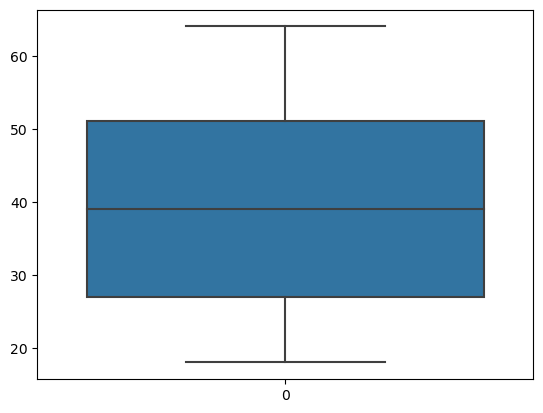

In [10]:
sns.boxplot(df['age'])

<AxesSubplot: xlabel='age', ylabel='Density'>

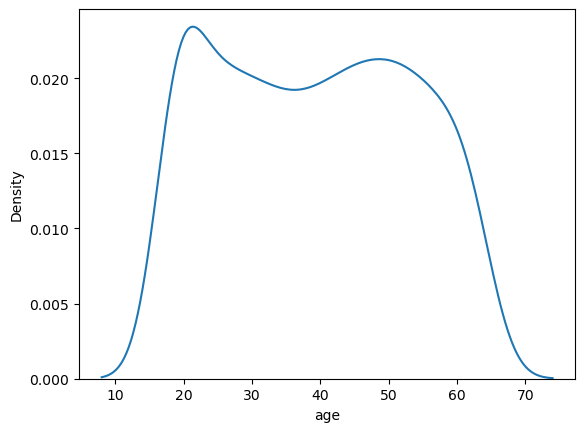

In [11]:
sns.kdeplot(df['age'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##### 3.2.2 bmi

In [13]:
df['bmi']

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

<AxesSubplot: >

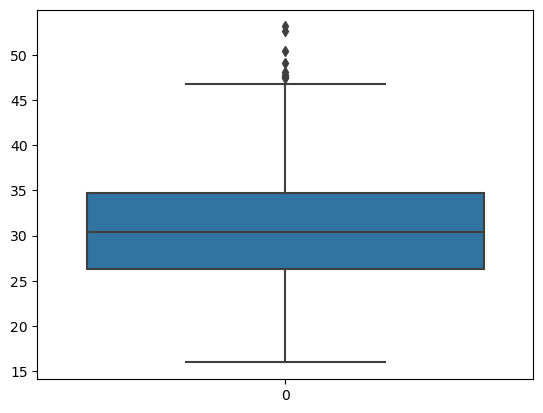

In [14]:
sns.boxplot(df['bmi']) #>> outliers are detected 

#### Transformation techniques

##### 1. yeo-johnson

<AxesSubplot: >

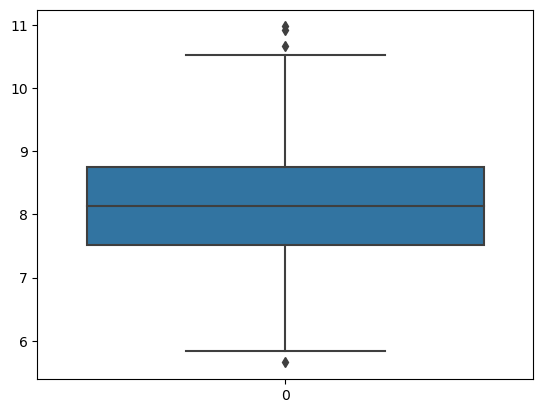

In [15]:
sns.boxplot(yeojohnson(df['bmi'])[0])

##### 2.boxcox

<AxesSubplot: >

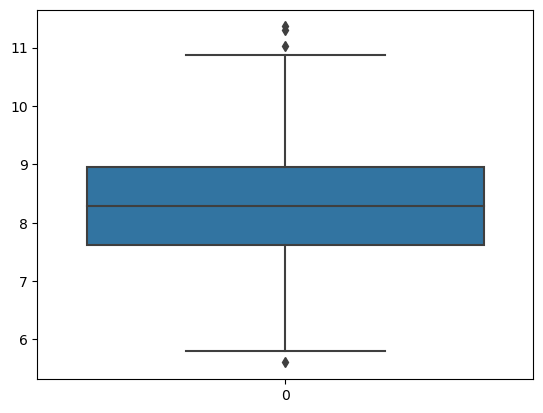

In [16]:
sns.boxplot(boxcox(df['bmi'])[0])

##### 2. power tranformation

<AxesSubplot: >

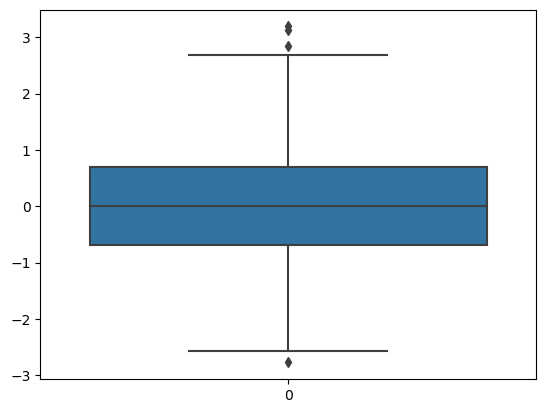

In [17]:
sns.boxplot(power_transform(df[['bmi']]))

##### 4.log transformation

<AxesSubplot: >

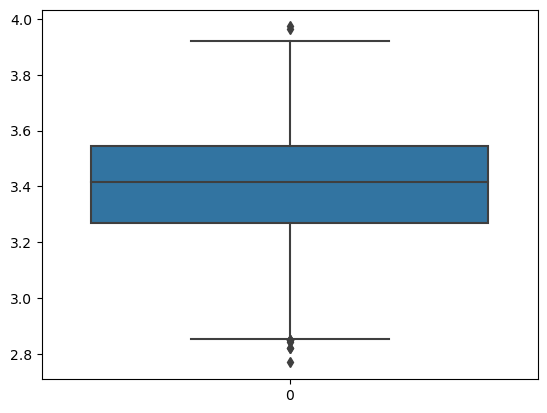

In [18]:
sns.boxplot(np.log(df['bmi']))

##### Z-score method >> bell shape 

In [19]:
from scipy.stats import zscore

z_score = zscore(df['bmi'])


for i in z_score:
    if np.abs(i) > 3:
    	print(i)

3.0178611981425605
3.234399911917402
3.595297768208803
3.685522232281654


In [20]:
ind = np.where(np.abs(z_score) > 3)[0]
df['bmi'][ind]

116     49.06
847     50.38
1047    52.58
1317    53.13
Name: bmi, dtype: float64

In [21]:
df['bmi'][ind] = df['bmi'].mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10132\1220436646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi'][ind] = df['bmi'].mean()


In [22]:
df['bmi'].mean()

30.601740349360185

In [23]:
df['bmi'].median()

30.4

<AxesSubplot: >

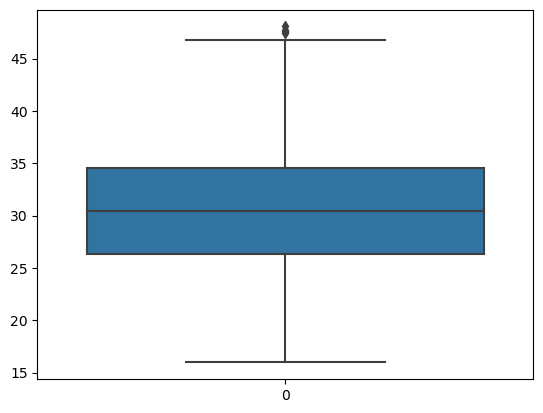

In [24]:
sns.boxplot((df['bmi']))

In [25]:
ind = np.where(np.abs(z_score) < 3)[0]
df['bmi'][ind]

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1334, dtype: float64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##### 3.2.3 charges

<AxesSubplot: >

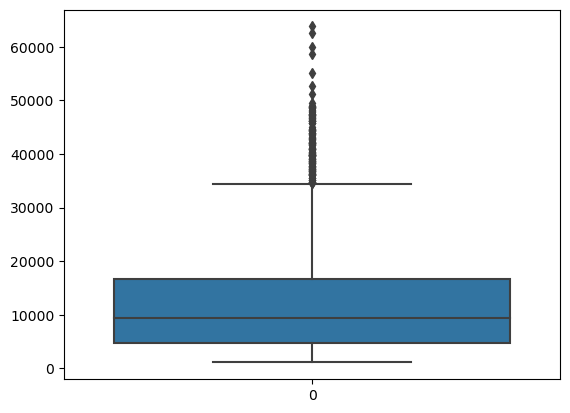

In [27]:
sns.boxplot(df['charges'])

<AxesSubplot: >

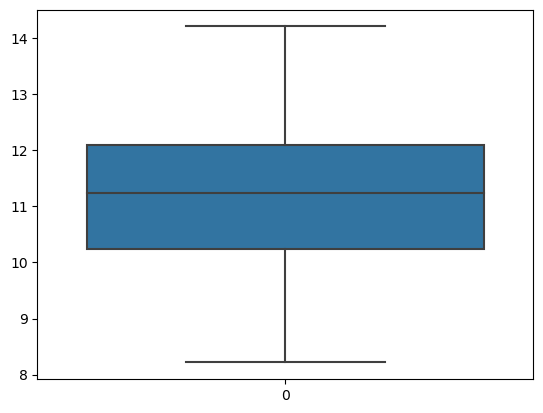

In [28]:
sns.boxplot(yeojohnson(df['charges'])[0])

<AxesSubplot: >

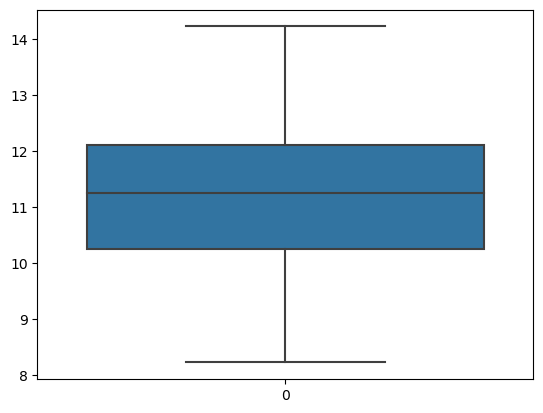

In [29]:
sns.boxplot(boxcox(df['charges'])[0])

In [52]:
df['charges'] = yeojohnson(df['charges'])[0]

In [30]:
df['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

<AxesSubplot: >

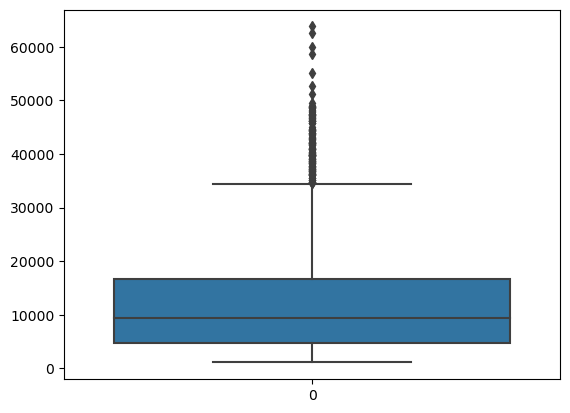

In [31]:
sns.boxplot(df['charges'])

In [55]:
# feature engineering done

### Univariate , Bivariate and multivariate analysis

In [ ]:
Univariate >> single feature

In [ ]:
Bivariate >> scatterplot  pairplot

In [ ]:
Multivariate >> col1 col2 dependent

In [ ]:
pairplot

<AxesSubplot: xlabel='charges', ylabel='age'>

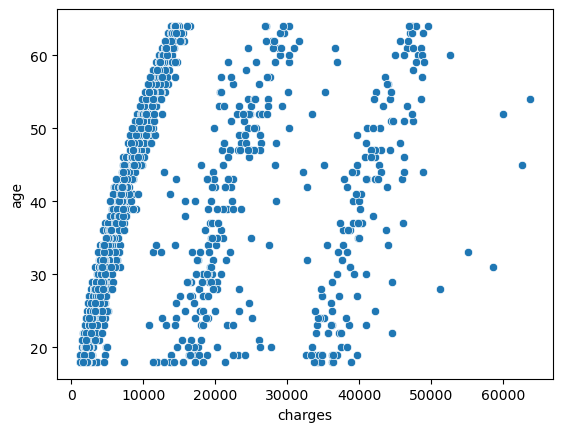

In [32]:
sns.scatterplot(y='age',x='charges',data=df)

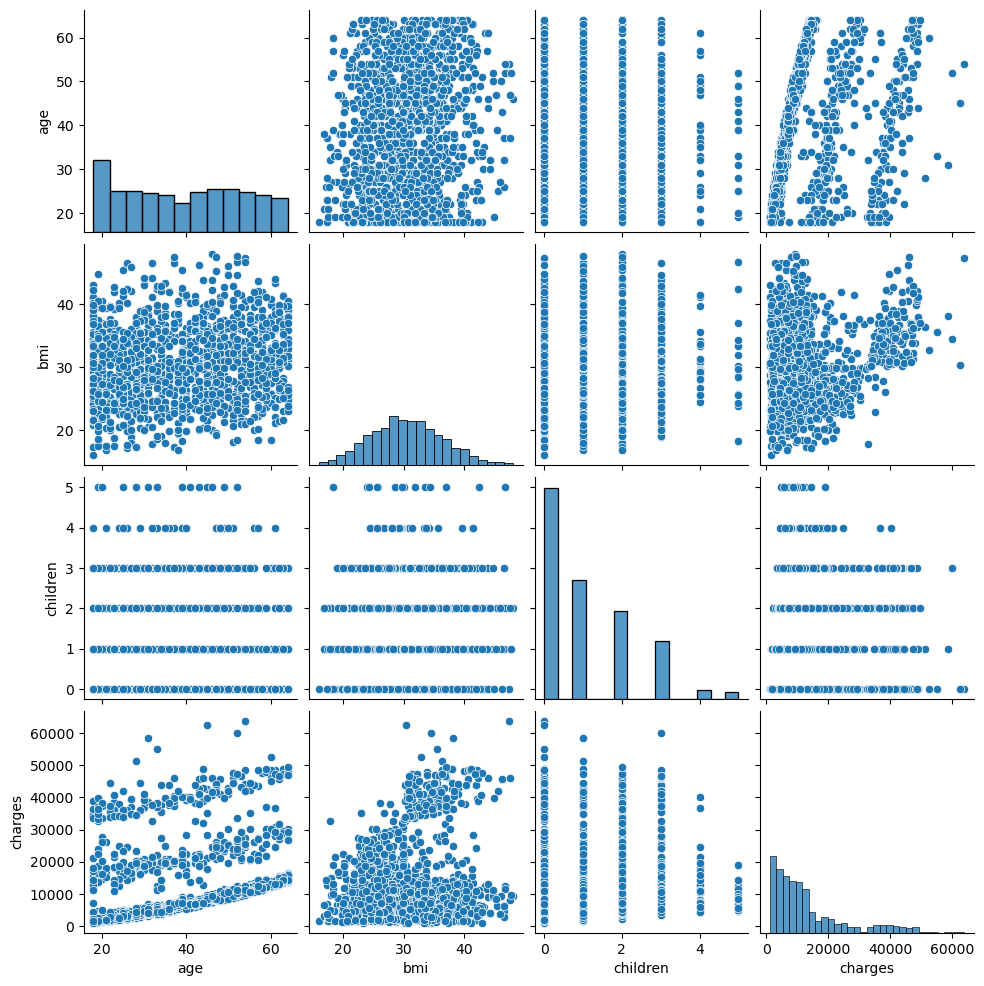

In [33]:
sns.pairplot(df)

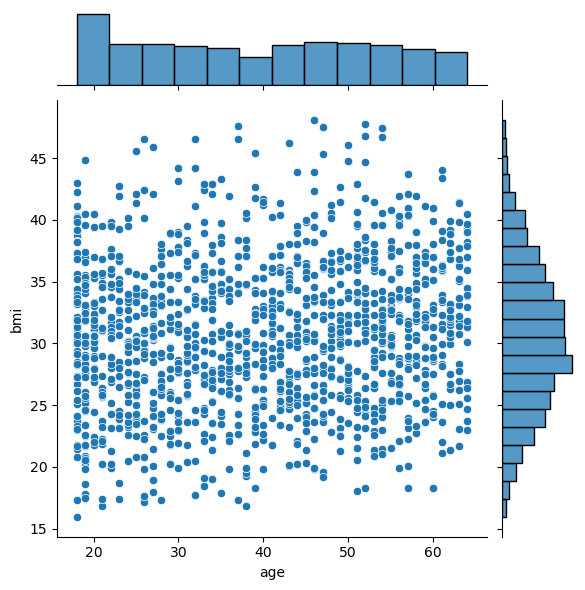

In [34]:
sns.jointplot(df,x='age',y='bmi')

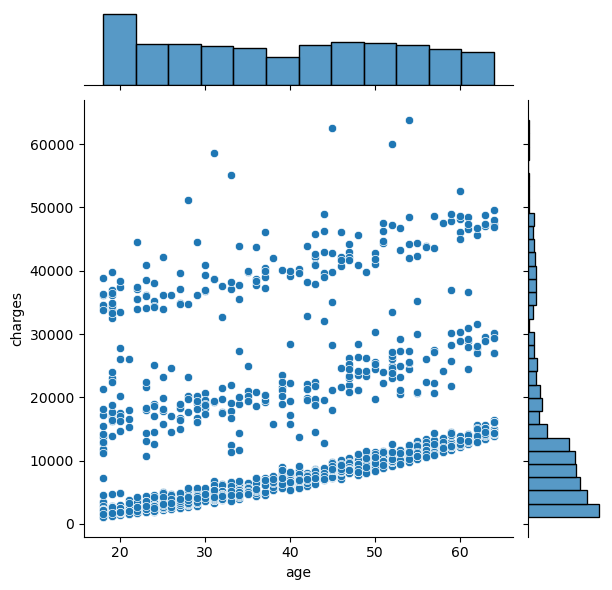

In [35]:
sns.jointplot(df,x='age',y='charges')

### Encoding

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##### 1.Gender

In [37]:
df['gender'].value_counts().to_dict()

{'male': 676, 'female': 662}

In [38]:
df['gender'] = df['gender'].replace({'male': 1, 'female': 0})

##### 2.children

In [39]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

##### 3.smoker

In [40]:
df['smoker'].value_counts().to_dict()

{'no': 1064, 'yes': 274}

In [41]:
df['smoker'] = df['smoker'].replace({'no': 1, 'yes': 0}) 

##### 4.region`

In [42]:
df['region'].value_counts() ## There no order in values 

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [43]:
df = pd.get_dummies(df,columns=['region'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   gender            1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


#### - feature engineering done

### Feature selection

##### 1.Filter method

In [ ]:
6-7

In [ ]:
dependent >> continuous

pearson  
spearman 

mutual information
Anova
kandell

In [45]:
pearson_corr = df.corr(method='pearson')['charges']

In [46]:
pd.DataFrame(pearson_corr)

,charges
age,0.299008
gender,0.057292
bmi,0.200166
children,0.067998
smoker,-0.787251
charges,1.000000
region_northeast,0.006349
region_northwest,-0.039905
region_southeast,0.073982
region_southwest,-0.043210


<AxesSubplot: >

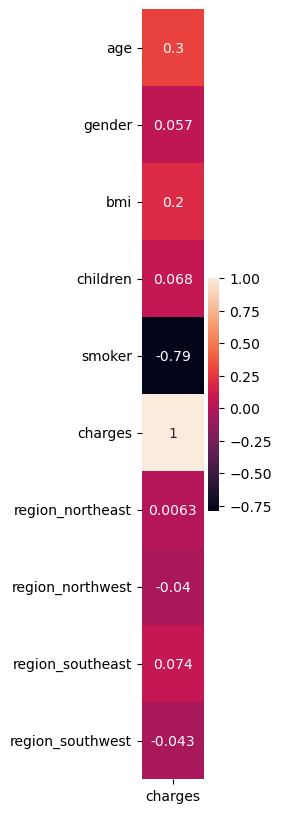

In [47]:
plt.figure(figsize=(1,10))
sns.heatmap(pd.DataFrame(pearson_corr),annot=True)

##### 1.2 spearman

<AxesSubplot: >

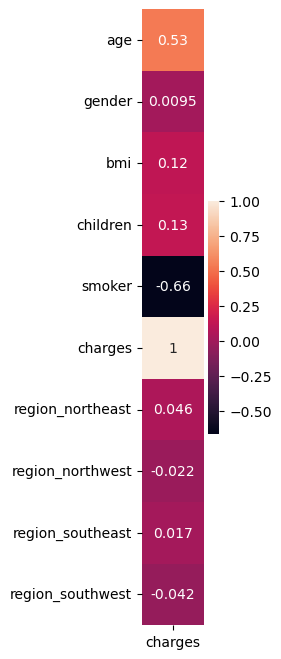

In [48]:
plt.figure(figsize=(1,8))
sns.heatmap(pd.DataFrame(df.corr(method='spearman')['charges']),annot=True)

##### 1.3 kendall

<AxesSubplot: >

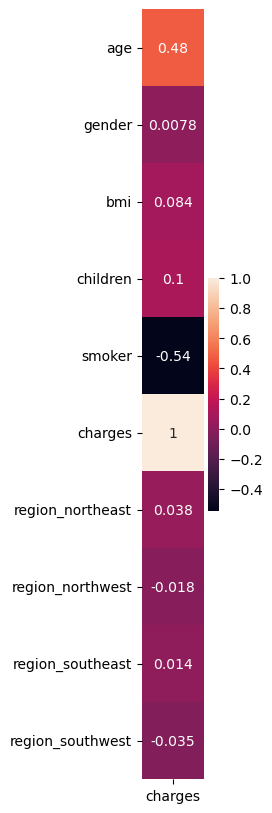

In [49]:
plt.figure(figsize=(1,10))
sns.heatmap(pd.DataFrame(df.corr(method='kendall')['charges']),annot=True)

### Variance inflation factor

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
vif_list = []
df1 = df.drop('charges',axis=1)
for i in range(0,df1.shape[1]):
    vif = variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)
    
vif_df = pd.DataFrame(vif_list,index=df1.columns,columns=['vif'])
vif_df

,vif
age,1.018996
gender,1.008085
bmi,1.101144
children,1.004163
smoker,1.012066
region_northeast,9.554433
region_northwest,9.674825
region_southeast,12.387251
region_southwest,10.268631


In [52]:
df1.shape

(1338, 9)

##### Variance threshold method

In [53]:
from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold=0.5)
var_thr.fit_transform(df)
var_thr.get_support()

array([ True, False,  True,  True, False,  True, False, False, False,
       False])

##### Mutual information

<AxesSubplot: >

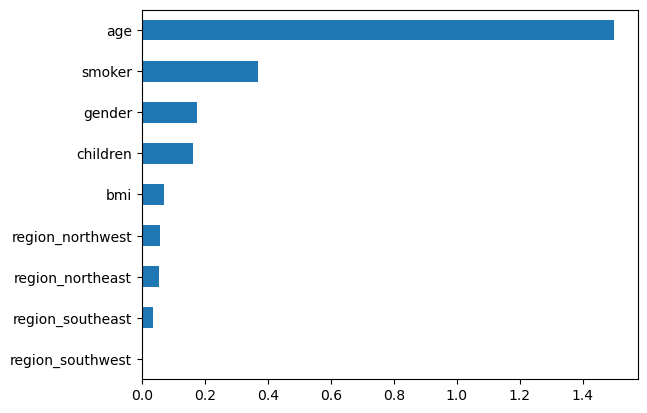

In [54]:
from sklearn.feature_selection import mutual_info_regression

array = mutual_info_regression(df.drop('charges',axis=1),df['charges'])
s1 = pd.Series(array,index=df1.columns)
s1.sort_values().plot(kind='barh')

###### from above we cannot make conclusion of which feature shold be dropped

### Wrapper methods

##### 1. forward feature selection

In [55]:
from sklearn.feature_selection import SequentialFeatureSelector,RFE

### Feature extraction

In [138]:
# after model training

### Model training

In [135]:
x = df.drop(['charges','gender'],axis=1)
y = df['charges']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=7)

##### scaling 

In [136]:
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test),columns=x_train.columns)


##### 1. Linear Regression

In [58]:
lin_model = LinearRegression(n_jobs=-1)
lin_model.fit(x_train,y_train)
y_train_pred = lin_model.predict(x_train)
y_pred = lin_model.predict(x_test)

print("R2-Trainig: ",r2_score(y_train,y_train_pred))
print("R2-Testing: ",r2_score(y_test,y_pred))

R2-Trainig:  0.7467354930867243
R2-Testing:  0.7635787563033237


##### lasso

In [59]:
lasso_reg = Lasso(random_state=7,alpha=0.001)
lasso_reg.fit(x_train,y_train)
y_train_pred = lasso_reg.predict(x_train)
y_pred = lasso_reg.predict(x_test)

print("R2-Trainig: ",r2_score(y_train,y_train_pred))
print("R2-Testing: ",r2_score(y_test,y_pred))

R2-Trainig:  0.7467354930866829
R2-Testing:  0.763578747130547


In [60]:
lasso_reg.feature_names_in_

array(['age', 'gender', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype=object)

In [61]:
lasso_reg.n_features_in_

9

In [62]:
lasso_reg.alpha

0.001

In [63]:
lasso_reg.get_params()

{'alpha': 0.001,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': 7,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [64]:
lasso_reg.coef_

array([ 3.55013868e+03, -7.35372722e+01,  2.10717674e+03,  5.49834490e+02,
       -9.54445682e+03,  4.27832030e+02,  1.08723430e+02,  8.14546702e+00,
       -4.06806315e+01])

<AxesSubplot: >

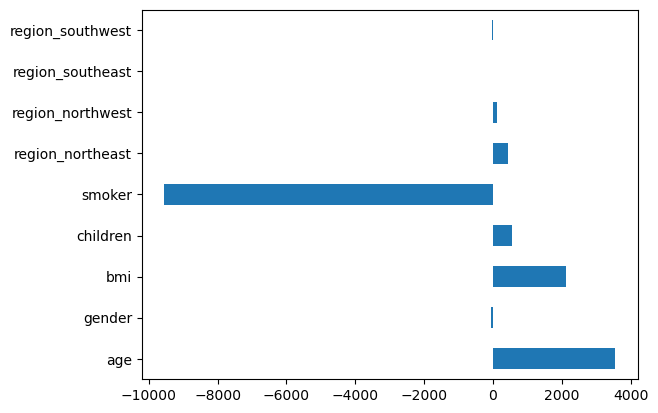

In [65]:
pd.Series(lasso_reg.coef_,index=x_train.columns).plot(kind='barh')

##### Ridge

In [66]:
ridge_reg = Ridge()
ridge_reg.fit(x_train,y_train)
y_train_pred = ridge_reg.predict(x_train)
y_pred = ridge_reg.predict(x_test)

print("R2-Trainig: ",r2_score(y_train,y_train_pred))
print("R2-Testing: ",r2_score(y_test,y_pred))

R2-Trainig:  0.7467348110515761
R2-Testing:  0.763497665870686


<AxesSubplot: >

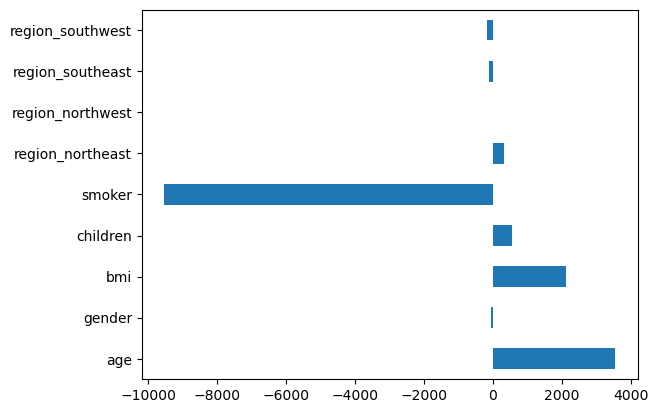

In [67]:
pd.Series(ridge_reg.coef_,index=x_train.columns).plot(kind='barh')

##### 2.KNN

In [68]:
knn_reg = KNeighborsRegressor(n_neighbors=5,n_jobs=-1)
knn_reg.fit(x_train,y_train)

y_train_pred = knn_reg.predict(x_train)
y_pred = knn_reg.predict(x_test)

print("R2-Trainig: ",r2_score(y_train,y_train_pred))
print("R2-Testing: ",r2_score(y_test,y_pred))

R2-Trainig:  0.8633003078300234
R2-Testing:  0.8102847676559861


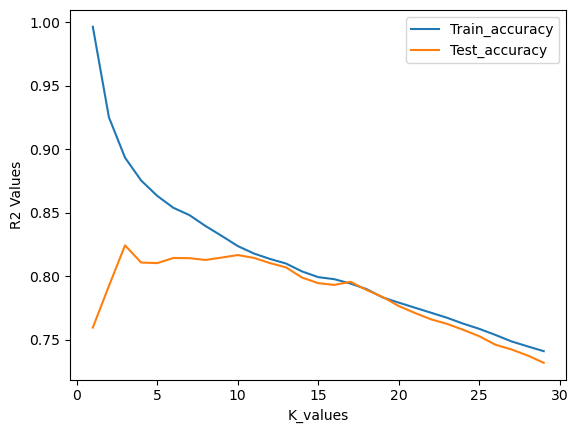

In [69]:
train_accuracy_list = []
test_accuracy_list = []

for i in np.arange(1,30):
    model = KNeighborsRegressor(n_neighbors=i,p=2)
    model.fit(x_train,y_train)
    
    y_train_pred = model.predict(x_train)
    y_pred = model.predict(x_test)
    
    train_accuracy_list.append(r2_score(y_train,y_train_pred))
    test_accuracy_list.append(r2_score(y_test,y_pred))
    
plt.plot(np.arange(1,30),train_accuracy_list)
plt.plot(np.arange(1,30),test_accuracy_list)
plt.xlabel('K_values')
plt.ylabel('R2 Values')
plt.legend(["Train_accuracy","Test_accuracy"])

In [70]:
test_accuracy_list

[0.7594745193077853,
 0.7923003031835174,
 0.8242701272962684,
 0.8107623645653819,
 0.8102847676559861,
 0.8143352364919715,
 0.8141836027035445,
 0.8127758560018552,
 0.8146459048167201,
 0.8166305220866689,
 0.8144303207795828,
 0.8103073673078565,
 0.8068995736252507,
 0.7988287041962108,
 0.7944857046898784,
 0.7930943353030004,
 0.7955601345960683,
 0.7891126095467936,
 0.7835939727356862,
 0.7764399277084758,
 0.7710052047390573,
 0.7659695723049019,
 0.7623787153350176,
 0.7577316253356979,
 0.7526461729241757,
 0.7459585802711997,
 0.7422053082221209,
 0.7374615325792926,
 0.7317168688410183]

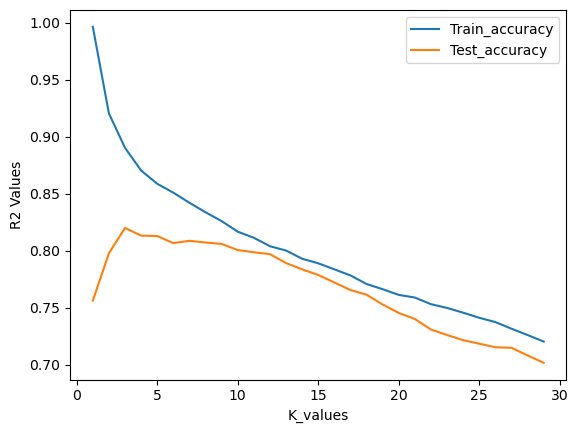

In [71]:
train_accuracy_list = []
test_accuracy_list = []

for i in np.arange(1,30):
    model = KNeighborsRegressor(n_neighbors=i,p=1)
    model.fit(x_train,y_train)
    
    y_train_pred = model.predict(x_train)
    y_pred = model.predict(x_test)
    
    train_accuracy_list.append(r2_score(y_train,y_train_pred))
    test_accuracy_list.append(r2_score(y_test,y_pred))
    
plt.plot(np.arange(1,30),train_accuracy_list)
plt.plot(np.arange(1,30),test_accuracy_list)
plt.xlabel('K_values')
plt.ylabel('R2 Values')
plt.legend(["Train_accuracy","Test_accuracy"])

In [72]:
test_accuracy_list

[0.7563132282710321,
 0.7978752907900869,
 0.8200871953558382,
 0.8133512513744185,
 0.8129853342453395,
 0.8067681526324,
 0.8088284748187424,
 0.8073085679039784,
 0.8060731745383977,
 0.8006925393248843,
 0.7987464016055277,
 0.7970923409511924,
 0.7892855359553226,
 0.7837734720340509,
 0.7788065291459672,
 0.7722256305893863,
 0.7655689005086525,
 0.7615296983650086,
 0.7529344682495254,
 0.7454736729574746,
 0.7401869416179103,
 0.7309425366405291,
 0.7261329462590486,
 0.7215710698862438,
 0.7184993205396111,
 0.7154090169930246,
 0.7149070937560309,
 0.7081948463503634,
 0.7017808000607115]

In [75]:
knn_reg = KNeighborsRegressor(n_neighbors=3,p=2)
knn_reg.fit(x_train,y_train)

y_train_pred = knn_reg.predict(x_train)
y_pred = knn_reg.predict(x_test)

print("R2-Trainig: ",r2_score(y_train,y_train_pred))
print("R2-Testing: ",r2_score(y_test,y_pred))

R2-Trainig:  0.8934184671746553
R2-Testing:  0.8242701272962684


In [76]:
knn_reg = KNeighborsRegressor(n_neighbors=3,p=1)
knn_reg.fit(x_train,y_train)

y_train_pred = knn_reg.predict(x_train)
y_pred = knn_reg.predict(x_test)

print("R2-Trainig: ",r2_score(y_train,y_train_pred))
print("R2-Testing: ",r2_score(y_test,y_pred))

R2-Trainig:  0.8903569208496416
R2-Testing:  0.8200871953558382


In [ ]:
Adjusted R2 = 1 - (((1-r2)*(n-1))/(n-k-1))

n >> number of rows
k >> no of columns

##### 3.Decision Tree

In [77]:
Dt_reg = DecisionTreeRegressor(random_state=7)
Dt_reg.fit(x_train,y_train)

y_train_pred = Dt_reg.predict(x_train)
y_pred = Dt_reg.predict(x_test)

print("R2-Trainig: ",r2_score(y_train,y_train_pred))
print("R2-Testing: ",r2_score(y_test,y_pred))

R2-Trainig:  0.9982937723923396
R2-Testing:  0.7643777232432707


In [78]:
dt_reg = DecisionTreeRegressor(random_state=7)
hyperparamter = {'criterion':['squared_error','absolute_error'],
                 'max_depth':np.arange(3,10),
                 'min_samples_split':np.arange(2,20),
                 'min_samples_leaf':np.arange(3,20)}

gscv_dt_reg = GridSearchCV(dt_reg,hyperparamter,cv=5,n_jobs=-1)
gscv_dt_reg.fit(x_train,y_train)



GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=7), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [79]:
gscv_dt_reg.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=6,
                      min_samples_leaf=6, min_samples_split=14, random_state=7)

In [80]:
Dt_reg = gscv_dt_reg.best_estimator_
Dt_reg.fit(x_train,y_train)

y_train_pred = Dt_reg.predict(x_train)
y_pred = Dt_reg.predict(x_test)

print("R2-Trainig: ",r2_score(y_train,y_train_pred))
print("R2-Testing: ",r2_score(y_test,y_pred))

R2-Trainig:  0.8595558011436389
R2-Testing:  0.8535259032393179


<AxesSubplot: >

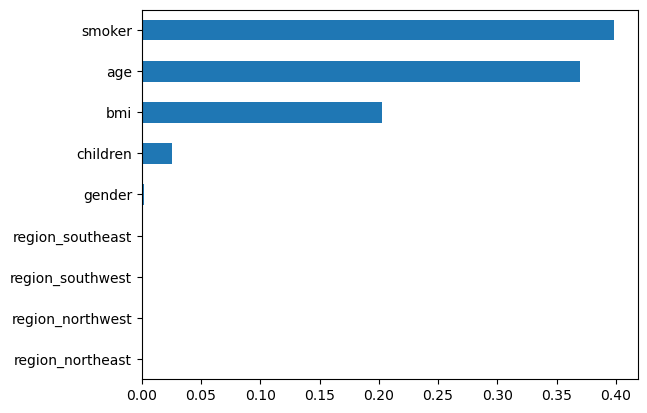

In [81]:
s1 = pd.Series(Dt_reg.feature_importances_,index=x.columns)
s1.sort_values().plot(kind='barh')

##### 4.Random Forest

In [82]:
rf_reg = RandomForestRegressor(random_state=7)
rf_reg.fit(x_train,y_train)

y_train_pred = rf_reg.predict(x_train)
y_pred = rf_reg.predict(x_test)

print("R2-Trainig: ",r2_score(y_train,y_train_pred))
print("R2-Testing: ",r2_score(y_test,y_pred))

R2-Trainig:  0.9763520327624601
R2-Testing:  0.8459084617414734


In [83]:
rf_reg = RandomForestRegressor(random_state=7)
hyperparamter = {'criterion':['squared_error','absolute_error'],
                 'max_depth':np.arange(3,10),
                 'min_samples_split':np.arange(2,20),
                 'min_samples_leaf':np.arange(3,20)}

gscv_rf_reg = RandomizedSearchCV(rf_reg,hyperparamter,cv=5,n_jobs=-1)
gscv_rf_reg.fit(x_train,y_train)

gscv_rf_reg.best_estimator_

RandomForestRegressor(max_depth=5, min_samples_leaf=7, min_samples_split=8,
                      random_state=7)

In [84]:
rf_reg = gscv_rf_reg.best_estimator_
Dt_reg.fit(x_train,y_train)

y_train_pred = rf_reg.predict(x_train)
y_pred = rf_reg.predict(x_test)

print("R2-Trainig: ",r2_score(y_train,y_train_pred))
print("R2-Testing: ",r2_score(y_test,y_pred))

R2-Trainig:  0.883944343820879
R2-Testing:  0.864751164646337


<AxesSubplot: >

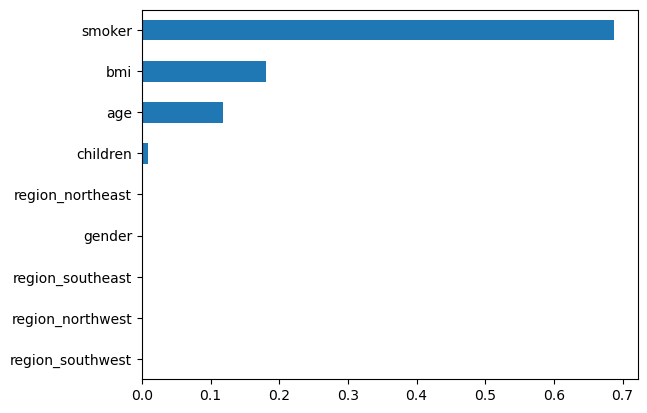

In [85]:
s1 = pd.Series(rf_reg.feature_importances_,index=x.columns)
s1.sort_values().plot(kind='barh')

### Wrapper methods

##### 1.forward feature selection

In [86]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [87]:
knn_reg1 = KNeighborsRegressor(n_neighbors=5)
sfs1 = SequentialFeatureSelector(estimator=knn_reg1,
                                 k_features=4,
                                 forward=True,
                                 cv=5,
                                 n_jobs=1)
sfs1.fit_transform(x_train,y_train)
s1 = pd.DataFrame(sfs1.subsets_)
s1.T

,feature_idx,cv_scores,avg_score,feature_names
1,"(4,)","[0.5127963038769394, 0.6358040944084797, 0.560...",0.539064,"(smoker,)"
2,"(2, 4)","[0.7358235529385169, 0.730842117476495, 0.7257...",0.724419,"(bmi, smoker)"
3,"(0, 2, 4)","[0.8316760458906315, 0.8414832850588938, 0.839...",0.824381,"(age, bmi, smoker)"
4,"(0, 2, 4, 8)","[0.847776429153596, 0.8474134041669162, 0.8477...",0.835416,"(age, bmi, smoker, region_southwest)"


##### 2.Backward feature selection

In [88]:
knn_reg1 = KNeighborsRegressor(n_neighbors=5,n_jobs=-1)

sfs2 = SequentialFeatureSelector(estimator = knn_reg1,
                                    k_features= 4 ,
                                    forward=False,
                                    cv=5,
                                    n_jobs=1)
sfs2.fit_transform(x_train,y_train)
s2 = pd.DataFrame(sfs2.subsets_)
s2.T

,feature_idx,cv_scores,avg_score,feature_names
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.7976758590048273, 0.7561429414517922, 0.780...",0.7729,"(age, gender, bmi, children, smoker, region_no..."
8,"(0, 2, 3, 4, 5, 6, 7, 8)","[0.8019279690385748, 0.8227394373920695, 0.817...",0.803853,"(age, bmi, children, smoker, region_northeast,..."
7,"(0, 2, 4, 5, 6, 7, 8)","[0.8266976699379966, 0.8383375923318644, 0.831...",0.826095,"(age, bmi, smoker, region_northeast, region_no..."
6,"(0, 2, 4, 5, 6, 7)","[0.8266976699379966, 0.838336177425818, 0.8317...",0.826094,"(age, bmi, smoker, region_northeast, region_no..."
5,"(0, 2, 4, 6, 7)","[0.8186908410764782, 0.8363501559560335, 0.830...",0.824525,"(age, bmi, smoker, region_northwest, region_so..."
4,"(0, 2, 4, 7)","[0.833393489310031, 0.840580316804525, 0.83899...",0.829245,"(age, bmi, smoker, region_southeast)"


##### 3.Bi directional feature selection

In [89]:
knn_reg1 = KNeighborsRegressor(n_neighbors=5,n_jobs=-1)
sfs3 = SequentialFeatureSelector(estimator = knn_reg1,
                                k_features=(3,5),
                                floating=True,
                                cv=5,
                                n_jobs=1)
sfs3.fit(x_train,y_train)
s3 = pd.DataFrame(sfs3.subsets_)
s3.T

,feature_idx,cv_scores,avg_score,feature_names
1,"(4,)","[0.5127963038769394, 0.6358040944084797, 0.560...",0.539064,"(smoker,)"
2,"(2, 4)","[0.7358235529385169, 0.730842117476495, 0.7257...",0.724419,"(bmi, smoker)"
3,"(0, 2, 4)","[0.8316760458906315, 0.8414832850588938, 0.839...",0.824381,"(age, bmi, smoker)"
4,"(0, 2, 4, 8)","[0.847776429153596, 0.8474134041669162, 0.8477...",0.835416,"(age, bmi, smoker, region_southwest)"
5,"(0, 2, 4, 7, 8)","[0.8347282077609226, 0.8471095292730051, 0.844...",0.833024,"(age, bmi, smoker, region_southeast, region_so..."


##### 4. Exhaustive feature selection

In [90]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
import warnings 
warnings.filterwarnings('ignore')

In [91]:
knn_reg1 = KNeighborsRegressor()
efs = ExhaustiveFeatureSelector(estimator = knn_reg1 ,
                                min_features=3,
                                max_features=5,
                                print_progress=True,
                                scoring='r2',
                                cv=3,
                                n_jobs=1)

In [92]:
efs.fit(x_train,y_train)

Features: 336/336

ExhaustiveFeatureSelector(cv=3, estimator=KNeighborsRegressor(),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7], [8]],
                          max_features=5, min_features=3, scoring='r2')

In [93]:
pd.DataFrame(efs.subsets_).T

,feature_idx,cv_scores,avg_score,feature_names
0,"(0, 1, 2)","[-0.036398441521000136, -0.17903215237120018, ...",-0.084451,"(age, gender, bmi)"
1,"(0, 1, 3)","[-0.04429684665974798, -0.07279934498374074, -...",-0.053577,"(age, gender, children)"
2,"(0, 1, 4)","[0.6560209352859847, 0.6442964422506516, 0.620...",0.640265,"(age, gender, smoker)"
3,"(0, 1, 5)","[-0.05714001132271185, -0.13839620921826512, 0...",-0.062574,"(age, gender, region_northeast)"
4,"(0, 1, 6)","[-0.01935175593526406, -0.09103426625433109, -...",-0.038983,"(age, gender, region_northwest)"
...,...,...,...,...
331,"(3, 4, 5, 6, 8)","[0.5834876039008831, 0.5157024415233322, 0.495...",0.531433,"(children, smoker, region_northeast, region_no..."
332,"(3, 4, 5, 7, 8)","[0.5795610636535319, 0.5119968454861641, 0.493...",0.528356,"(children, smoker, region_northeast, region_so..."
333,"(3, 4, 6, 7, 8)","[0.5834876039008831, 0.5164133615885302, 0.493...",0.531137,"(children, smoker, region_northwest, region_so..."
334,"(3, 5, 6, 7, 8)","[-0.20289929155549635, -0.14185429767200897, -...",-0.168173,"(children, region_northeast, region_northwest,..."


In [94]:
efs.best_idx_

(0, 2, 4, 8)

In [95]:
efs.best_feature_names_

('age', 'bmi', 'smoker', 'region_southwest')

###### 5. Recursive feature selection

In [96]:
lin_reg1 =  LinearRegression()
rfs = RFE(estimator=lin_reg1,
    n_features_to_select=4)

rfs.fit(x_train,y_train)
pd.DataFrame(rfs.support_)

,0
0,True
1,False
2,True
3,True
4,True
5,False
6,False
7,False
8,False


### From both filter method and wrapper method we can conclude that, "gender" feature has less importance.

### so we can drop gender from our dataset

In [97]:
x_train = x_train.drop('gender',axis=1)
x_train

,age,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.476440,0.021614,-0.906436,0.511657,-0.563679,-0.566558,1.609535,-0.557920
1,0.001249,0.231175,0.747249,0.511657,-0.563679,1.765045,-0.621297,-0.557920
2,-1.265341,-2.190297,-0.079593,0.511657,-0.563679,-0.566558,-0.621297,1.792372
3,-0.843144,-0.339172,-0.906436,-1.954436,-0.563679,1.765045,-0.621297,-0.557920
4,-0.209849,-0.085684,-0.906436,0.511657,-0.563679,1.765045,-0.621297,-0.557920
...,...,...,...,...,...,...,...,...
1065,0.071616,0.056902,2.400935,0.511657,-0.563679,1.765045,-0.621297,-0.557920
1066,0.845643,-1.221375,-0.079593,-1.954436,-0.563679,-0.566558,1.609535,-0.557920
1067,0.493813,-0.055666,0.747249,0.511657,-0.563679,-0.566558,-0.621297,1.792372
1068,-0.632046,-1.432336,-0.079593,0.511657,1.774059,-0.566558,-0.621297,-0.557920


In [98]:
x_test = x_test.drop('gender',axis=1)
x_test

,age,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,1.197474,1.548642,-0.906436,0.511657,-0.563679,-0.566558,1.609535,-0.557920
1,0.704911,-0.117370,-0.079593,0.511657,1.774059,-0.566558,-0.621297,-0.557920
2,-1.476440,-2.430443,-0.906436,0.511657,1.774059,-0.566558,-0.621297,-0.557920
3,0.001249,-2.040206,3.227778,-1.954436,-0.563679,-0.566558,-0.621297,1.792372
4,0.986376,-1.036262,-0.906436,0.511657,-0.563679,1.765045,-0.621297,-0.557920
...,...,...,...,...,...,...,...,...
263,0.353080,0.136117,-0.079593,-1.954436,1.774059,-0.566558,-0.621297,-0.557920
264,-0.843144,0.120274,-0.079593,0.511657,-0.563679,1.765045,-0.621297,-0.557920
265,1.127108,1.291820,-0.906436,0.511657,-0.563679,-0.566558,1.609535,-0.557920
266,-0.350581,0.528022,-0.079593,0.511657,-0.563679,-0.566558,-0.621297,1.792372


In [99]:
rf_reg = RandomForestRegressor(random_state=7)
rf_reg.fit(x_train,y_train)

y_train_pred = rf_reg.predict(x_train)
y_pred = rf_reg.predict(x_test)

print("R2-Trainig: ",r2_score(y_train,y_train_pred))
print("R2-Testing: ",r2_score(y_test,y_pred))

R2-Trainig:  0.9763875764923985
R2-Testing:  0.8478640314935642


In [100]:
rf_reg = RandomForestRegressor(random_state=7)
hyperparamter = {'criterion':['squared_error','absolute_error'],
                 'max_depth':np.arange(3,8),
                 'min_samples_split':np.arange(2,6),
                 'min_samples_leaf':np.arange(3,10)}

gscv_rf_reg = GridSearchCV(rf_reg,hyperparamter,cv=5,n_jobs=-1)
gscv_rf_reg.fit(x_train,y_train)

gscv_rf_reg.best_estimator_

RandomForestRegressor(max_depth=5, min_samples_leaf=7, random_state=7)

In [101]:
rf_reg = gscv_rf_reg.best_estimator_
Dt_reg.fit(x_train,y_train)

y_train_pred = rf_reg.predict(x_train)
y_pred = rf_reg.predict(x_test)

print("R2-Trainig: ",r2_score(y_train,y_train_pred))
print("R2-Testing: ",r2_score(y_test,y_pred))

R2-Trainig:  0.8834968993326842
R2-Testing:  0.8654995419912171


### Normality of residual

In [102]:
residual = y_test - y_pred

In [103]:
residual

13     -2050.324761
1052    -781.880002
172     -846.238192
1085    1749.563387
683    -2603.449638
           ...     
123    -2584.667959
1214   -1685.691408
97     -3006.940970
220     -773.912045
41     -1165.648312
Name: charges, Length: 268, dtype: float64

#### 1.kdeplot

<AxesSubplot: xlabel='charges', ylabel='Density'>

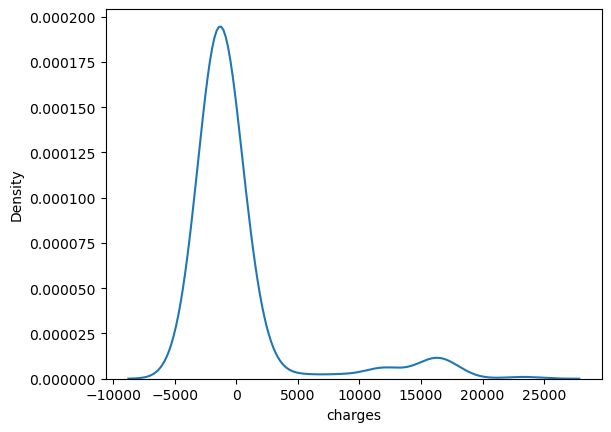

In [104]:
sns.kdeplot(residual)

##### 2.histplot

<AxesSubplot: xlabel='charges', ylabel='Count'>

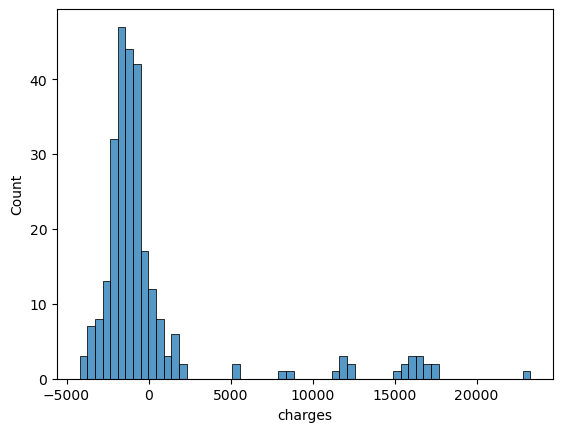

In [105]:
sns.histplot(residual)

##### QQ plot

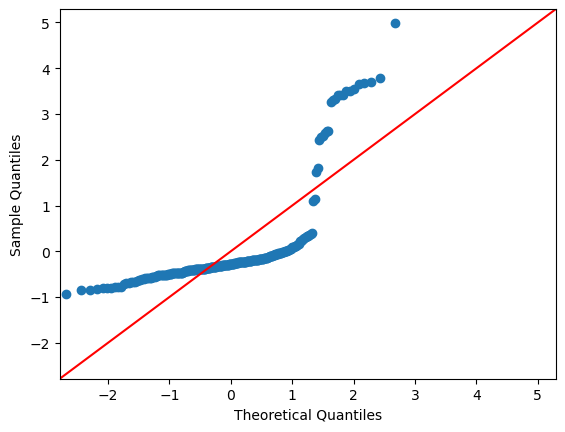

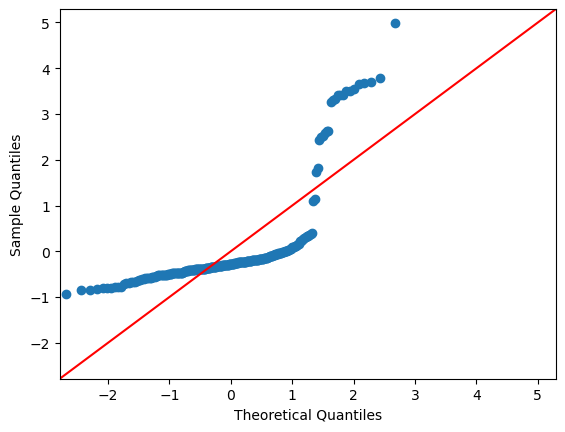

In [106]:
import statsmodels.api as sa
sa.qqplot(residual,line='45',fit=True)

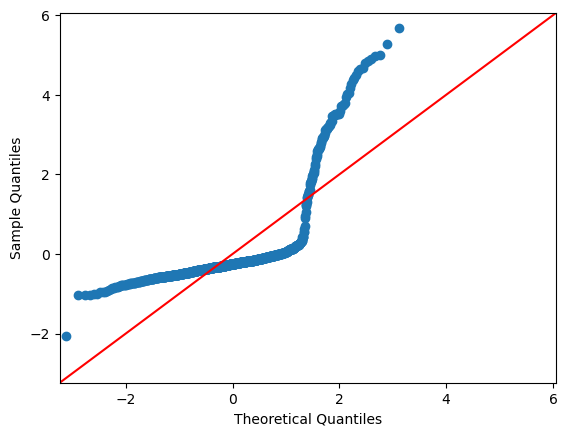

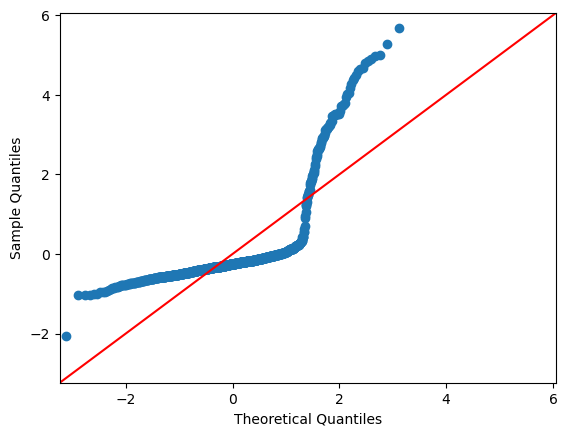

In [107]:
import statsmodels.api as sa
sa.qqplot((y_train-y_train_pred),line='45',fit=True)

### Hypothesis test

##### 1. kstest

In [108]:
from scipy.stats import kstest,normaltest,shapiro

In [109]:
_,p_val = kstest(residual,'norm')
if p_val>=0.05:
    print("Null Hypothesis is True")
    print("Data is normally distributed")
else:
    print("Null Hypothesis is not True")
    print("Data is not normally distributed")

Null Hypothesis is not True
Data is not normally distributed


##### 2.normaltest

In [110]:
_,p_val = normaltest(residual)
if p_val>=0.05:
    print("Null Hypothesis is True")
    print("Data is normally distributed")
else:
    print("Null Hypothesis is not True")
    print("Data is not normally distributed")

Null Hypothesis is not True
Data is not normally distributed


##### 3.shapiro

In [111]:
_,p_val = shapiro(residual)
if p_val>=0.05:
    print("Null Hypothesis is True")
    print("Data is normally distributed")
else:
    print("Null Hypothesis is not True")
    print("Data is not normally distributed")

Null Hypothesis is not True
Data is not normally distributed


In [112]:
from sklearn.tree  import plot_tree

[Text(0.42676767676767674, 0.9285714285714286, 'smoker <= -0.721\nabsolute_error = 8240.304\nsamples = 1070\nvalue = 9545.63'),
 Text(0.17676767676767677, 0.7857142857142857, 'bmi <= -0.087\nabsolute_error = 10335.867\nsamples = 222\nvalue = 33828.92'),
 Text(0.09090909090909091, 0.6428571428571429, 'age <= 0.142\nabsolute_error = 3802.908\nsamples = 110\nvalue = 19949.102'),
 Text(0.04040404040404041, 0.5, 'age <= -0.667\nabsolute_error = 1975.339\nsamples = 64\nvalue = 17845.306'),
 Text(0.020202020202020204, 0.35714285714285715, 'bmi <= -1.469\nabsolute_error = 1921.081\nsamples = 40\nvalue = 17062.211'),
 Text(0.010101010101010102, 0.21428571428571427, 'absolute_error = 796.733\nsamples = 7\nvalue = 14283.459'),
 Text(0.030303030303030304, 0.21428571428571427, 'bmi <= -0.436\nabsolute_error = 1742.568\nsamples = 33\nvalue = 17352.68'),
 Text(0.020202020202020204, 0.07142857142857142, 'absolute_error = 1287.56\nsamples = 20\nvalue = 16617.748'),
 Text(0.04040404040404041, 0.07142857

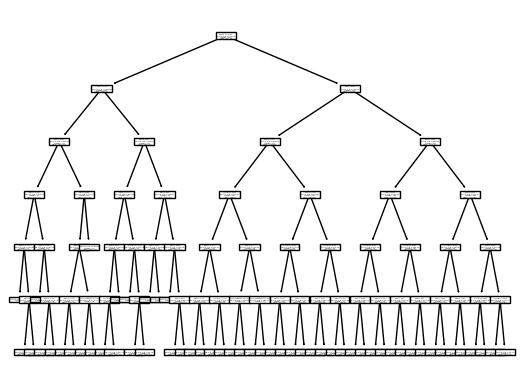

In [113]:
plot_tree(Dt_reg,feature_names=x_train.columns)

In [114]:
Dt_reg

DecisionTreeRegressor(criterion='absolute_error', max_depth=6,
                      min_samples_leaf=6, min_samples_split=14, random_state=7)

#### pruning

In [115]:
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor(random_state=7)

In [116]:
dt_reg.score(x_train,y_train)

0.9982929917988752

In [117]:
dt_reg.score(x_test,y_test)

0.782460452158151

In [118]:
ccp_alphas = dt_reg.cost_complexity_pruning_path(x_train,y_train)['ccp_alphas']

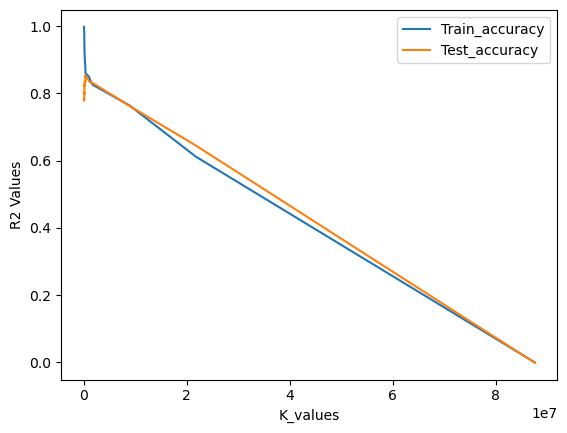

In [119]:
train_accuracy_list = []
test_accuracy_list = []

for i in ccp_alphas:
    model = DecisionTreeRegressor(random_state=7,ccp_alpha=i)
    model.fit(x_train,y_train)
    
    y_train_pred = model.predict(x_train)
    y_pred = model.predict(x_test)
    
    train_accuracy_list.append(r2_score(y_train,y_train_pred))
    test_accuracy_list.append(r2_score(y_test,y_pred))
    
plt.plot(ccp_alphas,train_accuracy_list)
plt.plot(ccp_alphas,test_accuracy_list)
plt.xlabel('K_values')
plt.ylabel('R2 Values')
plt.legend(["Train_accuracy","Test_accuracy"])

In [120]:
test_accuracy_list

[0.782460452158151,
 0.782460452158151,
 0.7824604572636402,
 0.7824604579815959,
 0.7824604579815959,
 0.7824604579720009,
 0.7824604579720009,
 0.7824604579720009,
 0.7824604579720009,
 0.7824604579720009,
 0.7824604579720009,
 0.7824604527229088,
 0.7824604527229088,
 0.7824604466971219,
 0.7824604466971219,
 0.7824604466971219,
 0.7824604466971219,
 0.7824604536686979,
 0.7824604606244119,
 0.7824604606244119,
 0.7824604606244119,
 0.7824604606244119,
 0.7824604692256784,
 0.7824606390764943,
 0.7824606390764943,
 0.7824606390764943,
 0.7824606390764943,
 0.7824606390732408,
 0.7824606416468737,
 0.7824604679623235,
 0.782460465607051,
 0.7824604655385554,
 0.7824604655385554,
 0.7824604655385554,
 0.782460450743564,
 0.7824604600110637,
 0.7824604600110637,
 0.7824604600110637,
 0.7824604600110637,
 0.7824604600110637,
 0.7824604394416375,
 0.7824604977528501,
 0.7824604977528501,
 0.7824604977528501,
 0.782460506841375,
 0.782460506841375,
 0.782460506841375,
 0.782460506841375,


### Feature extraction

In [122]:
from sklearn.decomposition import PCA

In [123]:
pca = PCA(n_components=None,random_state=7)
array = pca.fit_transform(x_train)

column_list = [f"PC{i}" for i in range(1,pca.n_components_+1)]

x_train_pca = pd.DataFrame(array,columns=column_list)
x_test_pca = pd.DataFrame(pca.transform(x_test),columns=column_list)

rf_reg1 = RandomForestRegressor(random_state=7,n_jobs=-1,criterion='absolute_error',min_samples_leaf=3 ,max_depth=7)
rf_reg1.fit(x_train_pca,y_train)

y_pred_train = rf_reg1.predict(x_train_pca)
y_pred       = rf_reg1.predict(x_test_pca)

print("Train accuracy: ",r2_score(y_train,y_pred_train))
print("Test Accuracy: ",r2_score(y_test,y_pred))

Train accuracy:  0.8842564885366067
Test Accuracy:  0.8318152821120903


In [124]:
x_train_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.391949,0.536608,0.163146,1.486346,-0.978347,-1.171163,-0.119437,-5.667012e-16
1,-0.643410,-1.209500,1.555643,-0.462057,0.133992,-0.339018,0.600621,-1.515618e-16
2,-1.409961,-0.877505,-1.684337,1.528767,0.344317,-1.218103,-1.170254,-1.477860e-16
3,-0.819529,-0.533498,1.484758,1.923297,0.084009,1.574014,0.503364,-7.140171e-16
4,-0.857435,-1.036441,1.305647,0.366906,-1.209343,0.107918,0.377231,-1.658954e-15
...,...,...,...,...,...,...,...,...
1065,-0.687297,-1.333102,1.822821,-1.044237,1.537962,-0.940464,0.502600,-4.784099e-17
1066,1.162576,0.740785,0.571460,0.878708,0.856845,1.267710,-2.057501,-1.113294e-16
1067,-0.186997,-1.275176,-1.606566,-0.674465,0.679118,-0.287141,-0.252595,1.999567e-16
1068,-1.701746,1.743483,-0.261223,0.122677,-0.133634,-0.842545,-0.371558,-1.069838e-16


##### select best N components

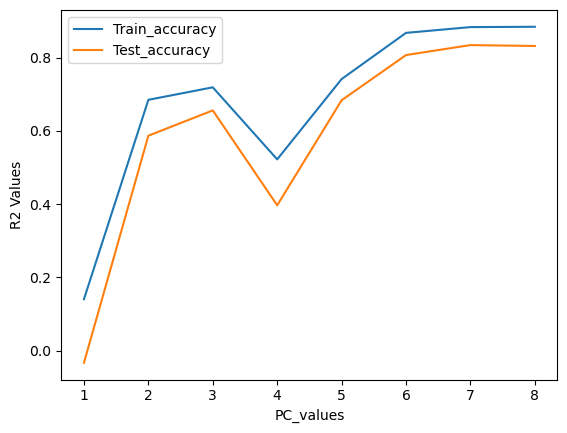

In [125]:
r2_train = []
r2_test = []
pca_list = np.arange(1,rf_reg.n_features_in_+1)
for i in pca_list:
    pca = PCA(n_components=i,random_state=7)
    array = pca.fit_transform(x_train)

    column_list = [f"PC{i}" for i in range(1,pca.n_components_+1)]

    x_train_pca = pd.DataFrame(array,columns=column_list)
    x_test_pca = pd.DataFrame(pca.transform(x_test),columns=column_list)

    rf_reg1 = RandomForestRegressor(random_state=7,n_jobs=-1,criterion='absolute_error',min_samples_leaf=3 ,max_depth=7)
    rf_reg1.fit(x_train_pca,y_train)

    r2_train.append(rf_reg1.score(x_train_pca,y_train))
    r2_test.append(rf_reg1.score(x_test_pca,y_test))
plt.plot(pca_list,r2_train)
plt.plot(pca_list,r2_test)
plt.xlabel('PC_values')
plt.ylabel('R2 Values')
plt.legend(["Train_accuracy","Test_accuracy"])

In [126]:
r2_test

[-0.032984545985958125,
 0.5869217377800915,
 0.6559399438805371,
 0.3969784329280255,
 0.6836315063726688,
 0.8070480211957266,
 0.8342957610869703,
 0.8318152821120903]

### Model evaluation

In [127]:
#train data evaluation

y_pred_train = rf_reg.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE: ",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE: ",mae)

r2 = r2_score(y_train,y_pred_train)
print("R-Squared : ",r2)

n = x_train.shape[0]
k = x_train.shape[1]

Adj_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
print("Adj R-Squared: ",Adj_r2)

MSE: 16676945.832662454
RMSE:  4083.7416461699013
MAE:  2234.743059748903
R-Squared :  0.8834968993326842
Adj R-Squared:  0.8826184593653529


In [128]:
#test data evaluation

y_pred_test = rf_reg.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE: ",rmse)

mae = mean_absolute_error(y_test,y_pred_test)
print("MAE: ",mae)

r2 = r2_score(y_test,y_pred_test)
print("R-Squared : ",r2)

n = x_test.shape[0]
k = x_test.shape[1]

Adj_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
print("Adj R-Squared: ",Adj_r2)

MSE: 21517891.64967943
RMSE:  4638.738152739324
MAE:  2562.4694709835467
R-Squared :  0.8654995419912171
Adj R-Squared:  0.8613450876897876


### Best model selection

In [129]:
import pickle
import json

In [137]:
pickle.dump(rf_reg,open(r"artifacts/model.pkl",'wb'))
pickle.dump(scaler,open("artifacts/scaler.pkl",'wb'))


### save model

In [131]:
rf_reg.feature_names_in_

array(['age', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype=object)

In [133]:
rf_reg.n_features_in_

8

In [301]:
data = {'feature':list(rf_reg.feature_names_in_),
       'smoker':{'no': 1, 'yes': 0}}

In [302]:
data

{'feature': ['age',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest'],
 'smoker': {'no': 1, 'yes': 0}}

In [303]:
json.dump(data,open('model_data.json','w'))

In [134]:
df.head(1).T

,0
age,19.000
gender,0.000
bmi,27.900
children,0.000
smoker,0.000
charges,16884.924
region_northeast,0.000
region_northwest,0.000
region_southeast,0.000
region_southwest,1.000


In [140]:
x_train.head(5)

,age,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.476440,0.021614,-0.906436,0.511657,-0.563679,-0.566558,1.609535,-0.557920
1,0.001249,0.231175,0.747249,0.511657,-0.563679,1.765045,-0.621297,-0.557920
2,-1.265341,-2.190297,-0.079593,0.511657,-0.563679,-0.566558,-0.621297,1.792372
3,-0.843144,-0.339172,-0.906436,-1.954436,-0.563679,1.765045,-0.621297,-0.557920
4,-0.209849,-0.085684,-0.906436,0.511657,-0.563679,1.765045,-0.621297,-0.557920


In [139]:
y_train.head(5)

1317     1163.4627
794      7209.4918
680      2585.2690
795     18310.7420
887      5272.1758
Name: charges, dtype: float64

In [141]:
df.head(5)

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,0,16884.92400,0,0,0,1
1,18,1,33.770,1,1,1725.55230,0,0,1,0
2,28,1,33.000,3,1,4449.46200,0,0,1,0
3,33,1,22.705,0,1,21984.47061,0,1,0,0
4,32,1,28.880,0,1,3866.85520,0,1,0,0


In [142]:
df.loc[df['charges'] < 4000]

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
1,18,1,33.770000,1,1,1725.5523,0,0,1,0
4,32,1,28.880000,0,1,3866.8552,0,1,0,0
5,31,0,25.740000,0,1,3756.6216,0,0,1,0
10,25,1,26.220000,0,1,2721.3208,1,0,0,0
12,23,1,34.400000,0,1,1826.8430,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1316,19,0,20.600000,0,1,1731.6770,0,0,0,1
1317,18,1,30.663397,0,1,1163.4627,0,0,1,0
1334,18,0,31.920000,0,1,2205.9808,1,0,0,0
1335,18,0,36.850000,0,1,1629.8335,0,0,1,0
